# Case Study 6

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [3]:
# !unzip "archive (1) (1).zip"

In [4]:
df = pd.read_csv("data.csv")
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
51,857373,B,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,...,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025,NaN
485,913063,B,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,...,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,NaN
390,90317302,B,10.26,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,...,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722,NaN
289,89143601,B,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,...,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994,NaN


In [5]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

(None,
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  texture_worst  perimeter_worst  

In [6]:
df = df.drop(columns=["id", "Unnamed: 32"])
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
226,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,0.1788,...,11.52,19.80,73.47,395.4,0.1341,0.1153,0.02639,0.04464,0.2615,0.08269
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
510,B,11.74,14.69,76.31,426.0,0.08099,0.09661,0.067260,0.02639,0.1499,...,12.45,17.60,81.25,473.8,0.1073,0.2793,0.26900,0.10560,0.2604,0.09879
361,B,13.30,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.02424,0.1815,...,14.20,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
182,M,15.70,20.31,101.20,766.6,0.09597,0.08799,0.065930,0.05189,0.1618,...,20.11,32.82,129.30,1269.0,0.1414,0.3547,0.29020,0.15410,0.3437,0.08631


# Checking Target Variable

In [8]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [9]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [10]:
df["diagnosis"].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [11]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

# Label Encoder

In [13]:
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
529,0,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,...,13.45,15.77,86.92,549.9,0.15210,0.1632,0.1622,0.07393,0.2781,0.08052
359,0,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,...,12.02,25.02,75.79,439.6,0.13330,0.1049,0.1144,0.05052,0.2454,0.08136
63,0,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,...,10.01,19.23,65.59,310.1,0.09836,0.1678,0.1397,0.05087,0.3282,0.08490
138,1,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,18.55,21.43,121.40,971.4,0.14110,0.2164,0.3355,0.16670,0.3414,0.07147
75,1,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,...,19.77,24.56,128.80,1223.0,0.15000,0.2045,0.2829,0.15200,0.2650,0.06387


In [14]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

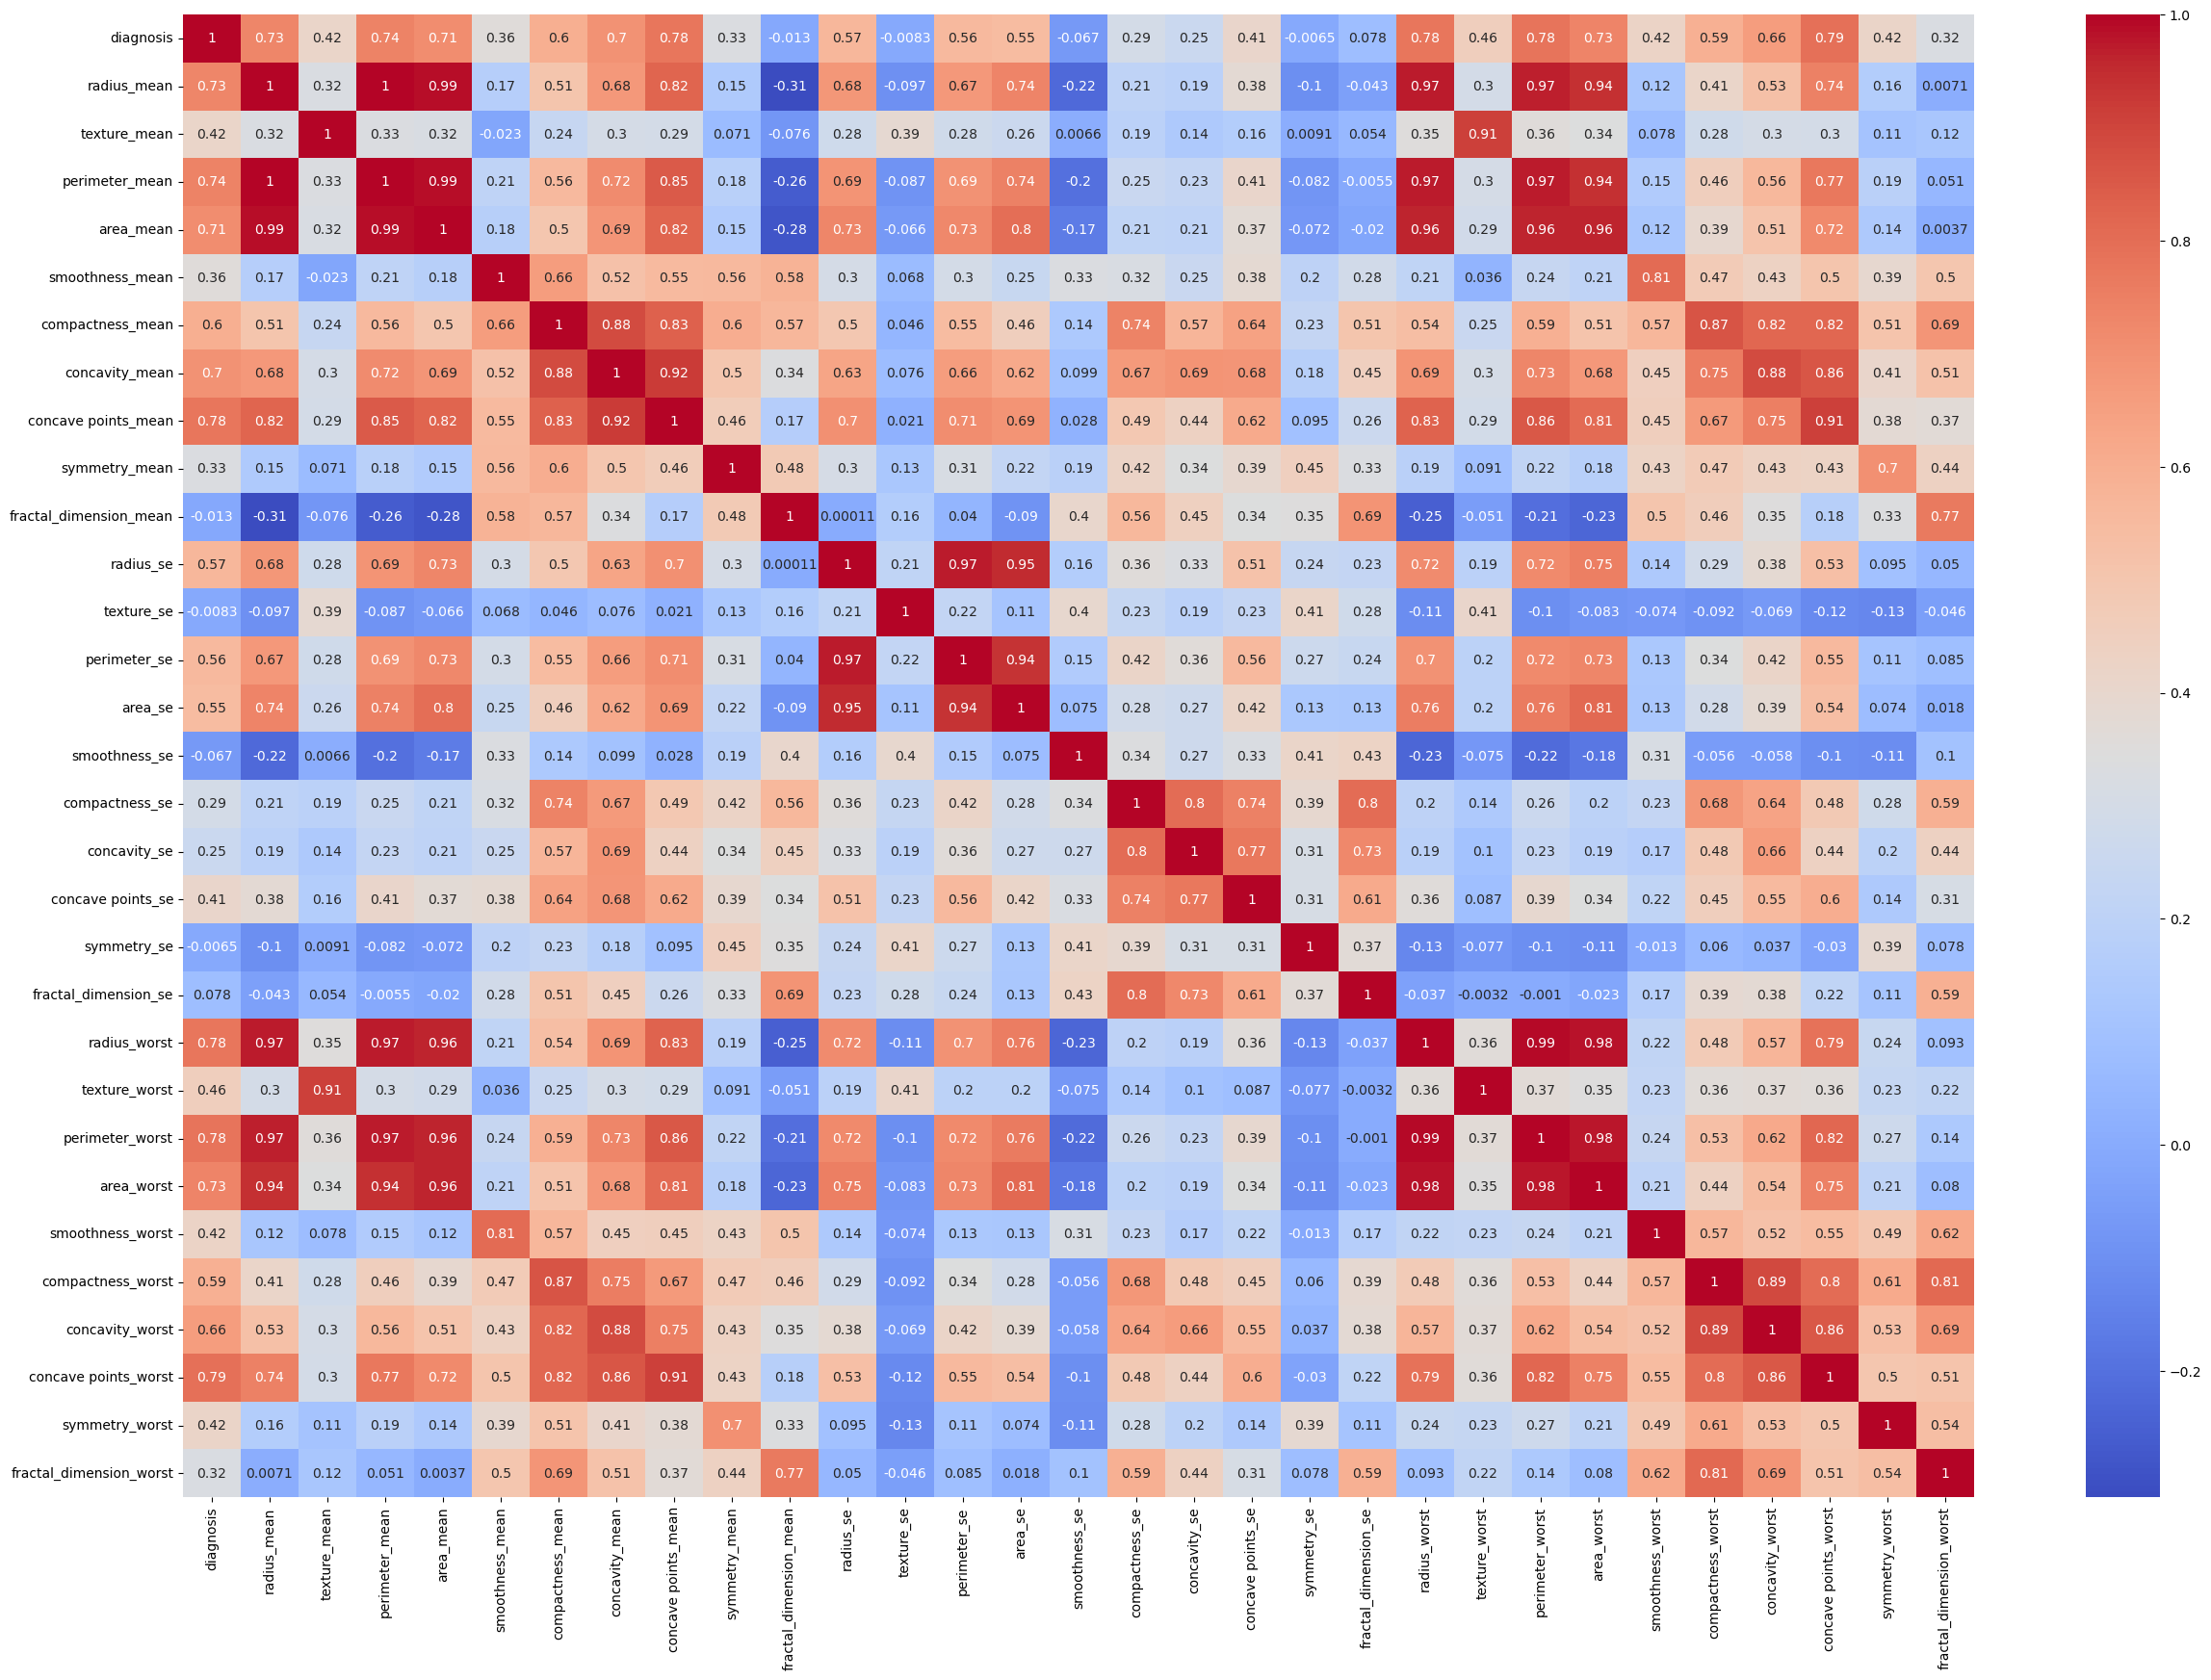

In [15]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Spliting Data For training and testing

In [17]:
X = df.drop(columns=["diagnosis"])
Y = df["diagnosis"]

In [18]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [19]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [22]:
x_test.shape, y_test.shape

((114, 30), (114,))

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_pred = model.predict(x_test)

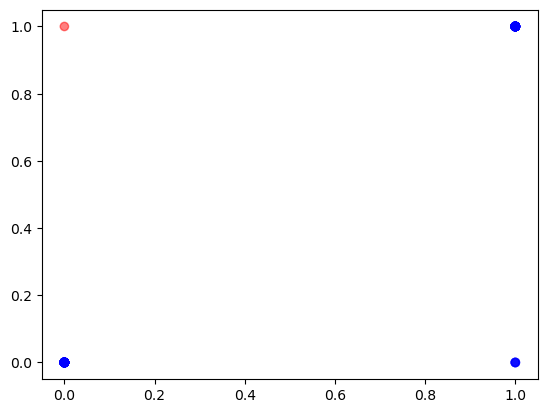

In [25]:
colors=np.where(y_pred>y_test,'red','blue')
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)

# Logistic Regression

In [27]:
accuracy = accuracy_score(y_pred,y_test)
print(f"accuracy is: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision is: {precision}")

recall = recall_score(y_test, y_pred)
print(f"recall is: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"recall is: {recall}")

accuracy is: 0.956140350877193
Precision is: 0.975
recall is: 0.9069767441860465
recall is: 0.9069767441860465


In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[70,  1],
       [ 4, 39]], dtype=int64)

In [29]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Decision Tree

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.6145833333333334, 0.9375, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3958333333333333, 0.8125, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.5052083333333334, 0.875, 'True  '),
 Text(0.2916666666666667, 0.6875, 'x[13] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.20833333333333334, 0.5625, 'x[24] <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.16666666666666666, 0.4375, 'x[14] <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [257, 2]'),
 Text(0.08333333333333333, 0.3125, 'x[26] <= 0.195\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.25, 0.3125, 'x[21] <= 33.35\ngini = 0.008\nsamples = 252\nvalue = [251, 1]'),
 Text(0.20833333333333334, 0.1875, 'gini = 0.0\nsamples = 237\nvalue = [237, 0]'),
 Text(0.2916666666666667, 0.1875, 'x[21] <

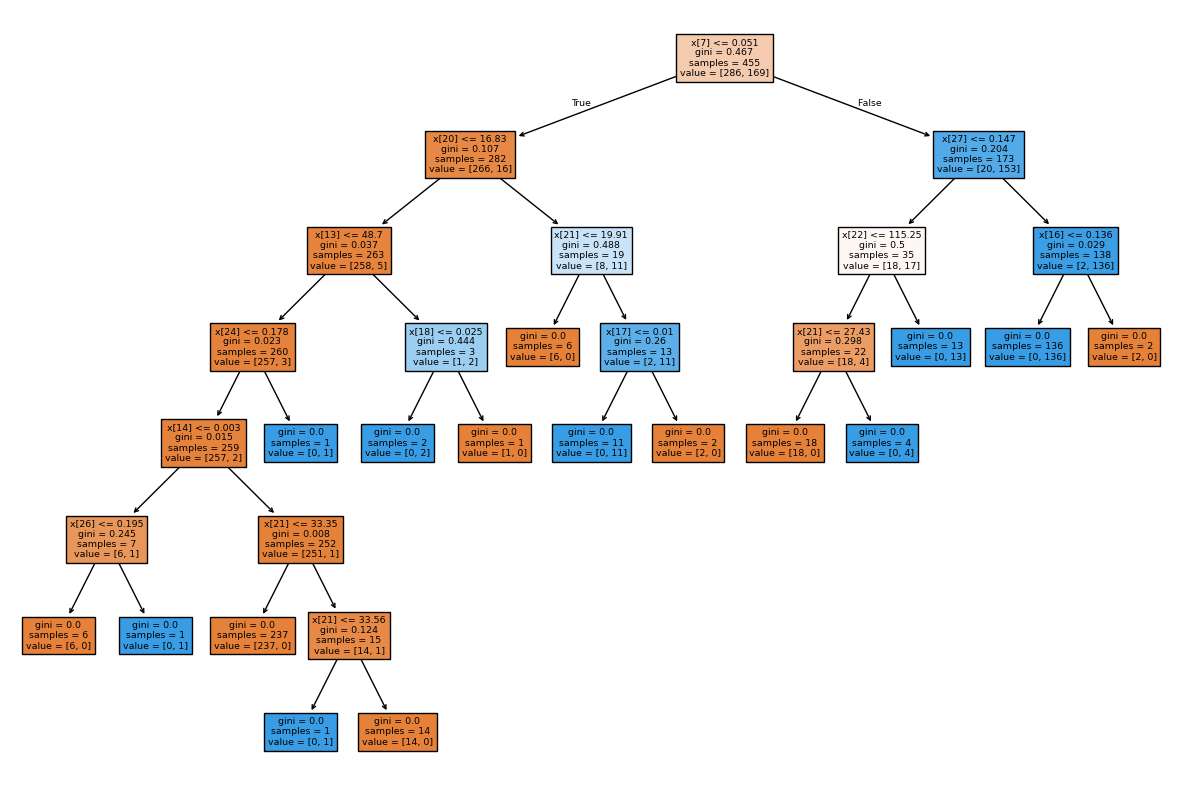

In [32]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_model, filled=True)

In [33]:
y_pred = dt_model.predict(x_test)

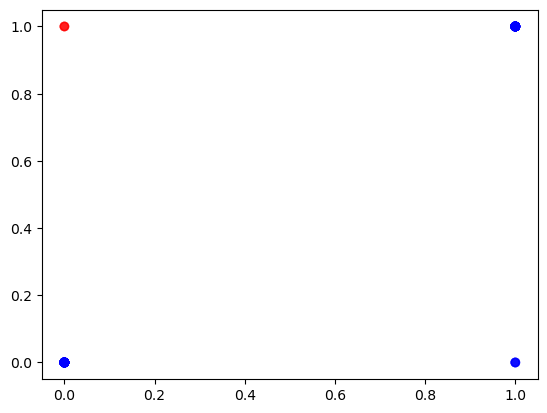

In [34]:
colors=np.where(y_pred>y_test,'red','blue')
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)

In [35]:
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9385964912280702

In [36]:
precision = precision_score(y_test, y_pred)
precision

0.9285714285714286

In [37]:
recall = recall_score(y_test, y_pred)
recall

0.9069767441860465

In [38]:
f1 = f1_score(y_test, y_pred)
f1

0.9176470588235294

In [39]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[68,  3],
       [ 4, 39]], dtype=int64)

In [40]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [86]:
corr_matrix = X.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<Axes: >

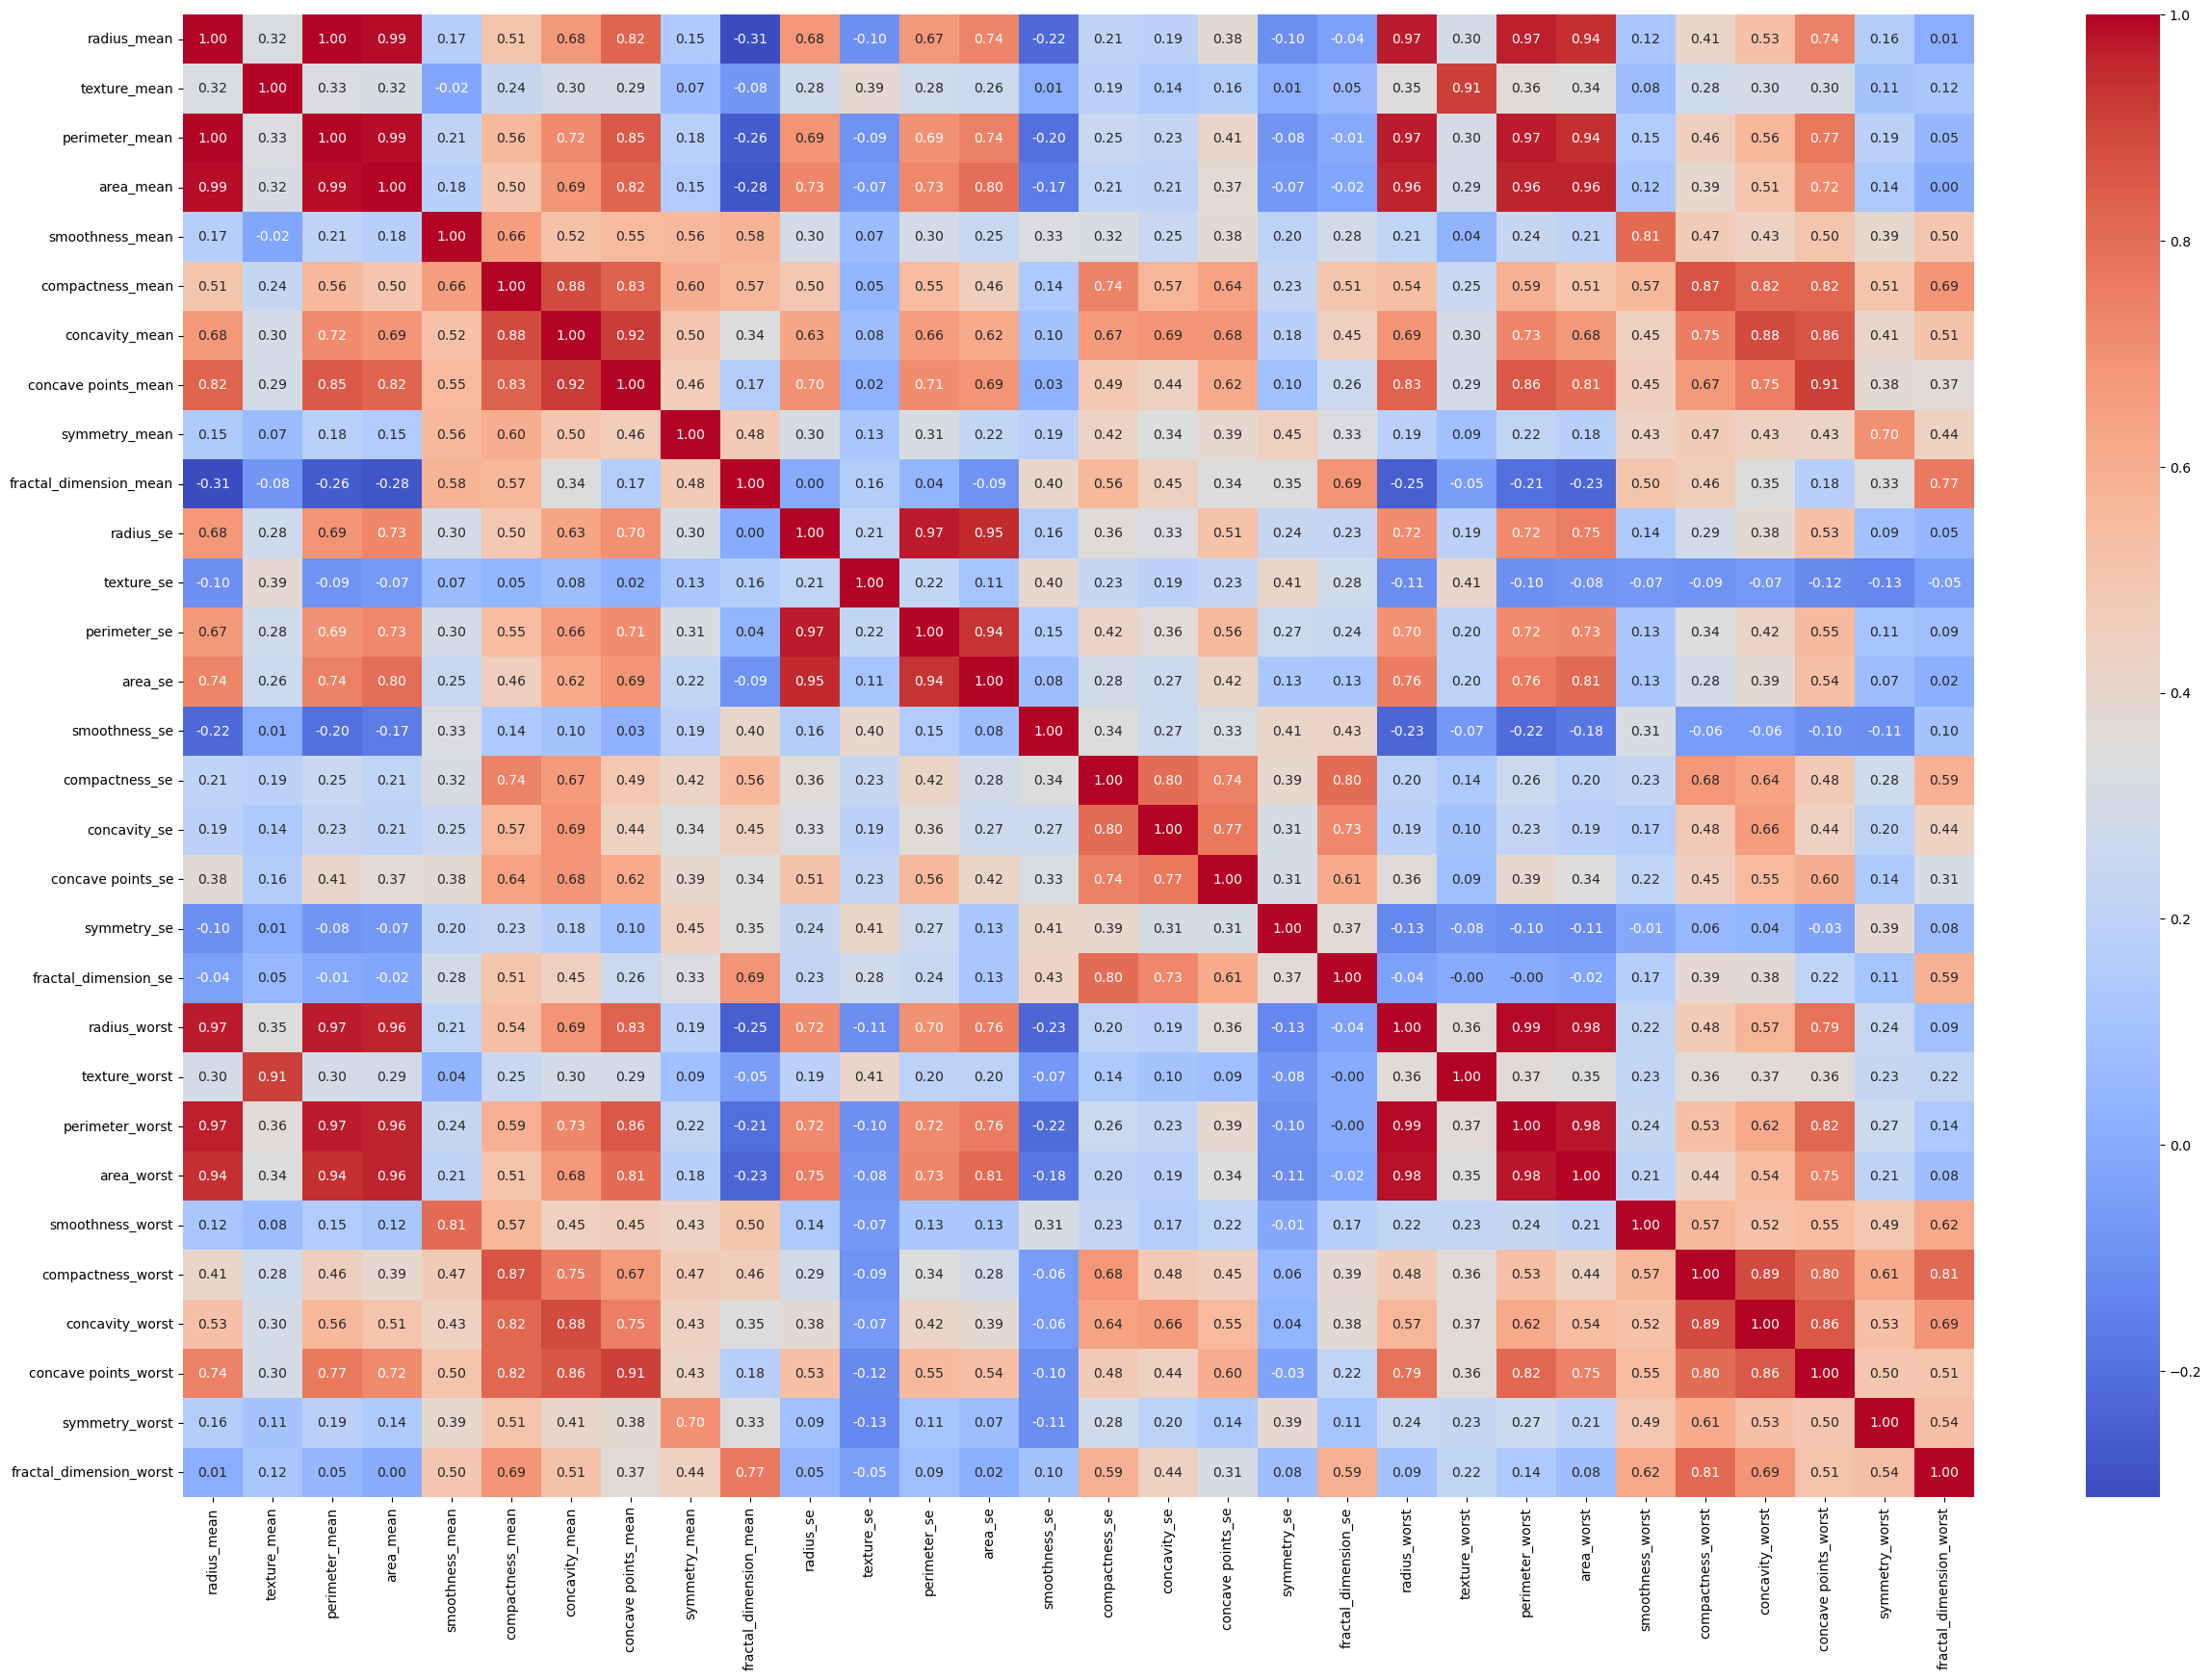

In [94]:
plt.figure(figsize=(30,20))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt=".2f")

In [96]:
# Identify highly correlated feature pairs (correlation > 0.8)
high_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)  # Flatten and sort
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.8]  # Filter pairs with correlation > 0.8
print(f"Highly correlated pairs:\n{high_corr_pairs}")

Highly correlated pairs:
radius_mean           radius_mean             1.000000
compactness_se        compactness_se          1.000000
area_mean             area_mean               1.000000
smoothness_mean       smoothness_mean         1.000000
compactness_mean      compactness_mean        1.000000
                                                ...   
concavity_se          compactness_se          0.801268
compactness_worst     concave points_worst    0.801080
concave points_worst  compactness_worst       0.801080
area_se               area_mean               0.800086
area_mean             area_se                 0.800086
Length: 118, dtype: float64


In [103]:
# Iterate over the highly correlated feature pairs and drop one feature at a time

for feature in high_corr_pairs.index.get_level_values(0):
    if feature != 'diagnosis':  # Don't drop the target variable itself
        print(f"\nDropping feature: {feature}")


Dropping feature: radius_mean

Dropping feature: compactness_se

Dropping feature: area_mean

Dropping feature: smoothness_mean

Dropping feature: compactness_mean

Dropping feature: concavity_mean

Dropping feature: concave points_mean

Dropping feature: symmetry_mean

Dropping feature: fractal_dimension_mean

Dropping feature: radius_se

Dropping feature: texture_se

Dropping feature: perimeter_se

Dropping feature: area_se

Dropping feature: smoothness_se

Dropping feature: concavity_se

Dropping feature: texture_mean

Dropping feature: concave points_se

Dropping feature: symmetry_se

Dropping feature: fractal_dimension_se

Dropping feature: radius_worst

Dropping feature: texture_worst

Dropping feature: perimeter_worst

Dropping feature: area_worst

Dropping feature: smoothness_worst

Dropping feature: compactness_worst

Dropping feature: concavity_worst

Dropping feature: concave points_worst

Dropping feature: symmetry_worst

Dropping feature: perimeter_mean

Dropping feature:

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [109]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [111]:
x_test.shape, y_test.shape

((114, 30), (114,))

In [ ]:
dt_refined_model = DecisionTreeClassifier()
df

# Random Forest